# 머신러닝

In [1]:
# 도미 데이터

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 
                30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 
                33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 
                36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
                700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
                925.0, 975.0, 950.0]

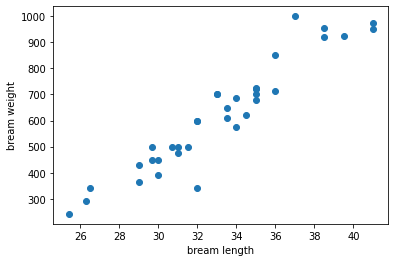

In [3]:
import matplotlib.pyplot as plt

# 도미 데이터 산점도
plt.scatter(bream_length, bream_weight)
plt.xlabel('bream length') # x축은 길이
plt.ylabel('bream weight') # y축은 무게
plt.show()

In [4]:
# 빙어 데이터

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 
                12.2, 12.4, 13.0, 14.3, 15.0]

smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 
                13.4, 12.2, 19.7, 19.9]

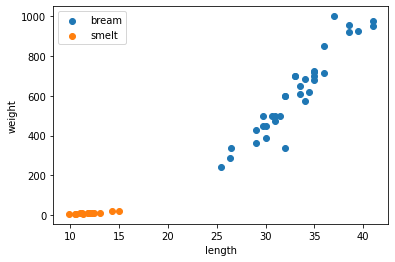

In [5]:
# 도미 데이터와 빙어 데이터 비교(산점도)

plt.scatter(bream_length, bream_weight, label='bream')
plt.scatter(smelt_length, smelt_weight, label='smelt')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [14]:
# 도미 데이터와 빙어 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 데이터 변형
# 1차원 리스트 2개를 2차원 리스트로 변경
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [9]:
# zip() 함수
# 2개 이상의 리스트를 받아서 하나로 묶음(튜플)
numbers = [ 1, 2, 3, 4 ]
letters = ['A', 'B', 'C', 'D']
for pair in zip(numbers, letters):
    print(pair)

pair = list(zip(numbers, letters))
print(pair)

n1, l1 = zip(*pair) # zip 해제 : *사용
print(n1, l1)

(1, 'A')
(2, 'B')
(3, 'C')
(4, 'D')
[(1, 'A'), (2, 'B'), (3, 'C'), (4, 'D')]
(1, 2, 3, 4) ('A', 'B', 'C', 'D')


In [15]:
# 정답 데이터 준비
# 도미를 1로 빙어를 0으로 설정
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


---

## kNN(k-최근접 알고리즘, k-Nearest Neighbor)

 - 가장 간단한 분류 알고리즘(classification)
   - “비슷한 특성을 가진 데이터는 비슷한 범주에 속한다”는 가정
   - 주변의 가장 가까운 k개의 데이터를 보고, 데이터가 속할 그룹을 판단
 - 단점
   - 모든 데이터를 가지고 있어야 됨
   - 많은 메모리 소모, 거리 계산에 많은 시간이 소요

 - 과정

   - 모델생성, 모델훈련(fit), 모델 평가(score), 새로운 데이터 예측(predict)

In [20]:
# kNN 모델 생성
from sklearn.neighbors import  KNeighborsClassifier
kn = KNeighborsClassifier() # KNeighborClassifier(n_ngighbors=기본값5, …) 객체 생성

In [21]:
# 모델 훈련(학습): 객체.fit() 함수

# fit(Training data, Target values) 함수
# fish_data와 fish_target을 이용하여 모델 훈련

kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [22]:
# 모델 평가: 객체.score() 함수

# score(Test samples, Target values): 정확도의 평균값 리턴

kn.score(fish_data, fish_target)

1.0

In [23]:
# 새로운 데이터를 활용한 결과 예측: 객체.predict(X), X: 2차원 리스트 형태
kn.predict([[30, 600]]) # class label 리턴(0, 1)

array([1])

In [ ]:
# k-최근접 알고리즘 속성

# 객체._fit_X : 훈련데이터
print(kn._fit_X)
# kn._y : 목표(target) 데이터
print(kn._y)

In [27]:
# n_neighbors 값 변경(49)
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
print(kn49.score(fish_data, fish_target))

# 35/49의 결과와 동일
# 전체 데이터에서 도미 데이터가 35개라서 
print(35/49)

0.7142857142857143
0.7142857142857143


---

In [29]:
# 훈련 세트와 테스트 세트 만들기

# 데이터 생성
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 
              30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 
              33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0,
              36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,  
              10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 
              12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
               450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
               700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
               925.0, 975.0, 950.0, 6.7,  7.5, 7.0, 9.7, 9.8, 8.7, 
               10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)] # 2차원 리스트[길이, 무게]
fish_target = [1] * 35 + [0]*14 # target 값 생성

In [30]:
# 잘못된 훈련 세트

# 훈련 세트 생성(35개)
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스트 세트 생성(14개)
test_input = fish_data[35:]
test_target = fish_target[35:]

# 테스트 세트 평가
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier() # 객체 생성
kn = kn.fit(train_input, train_target) # 모델 훈련
kn.score(test_input, test_target) # 테스트 세트로 평가 (정확도 출력)

# => 훈련세트가 도미로만 구성, 잘못된 세트 분류

0.0

In [31]:
# Numpy를 활용한 배열 생성
# 다차원 배열을 쉽게 조작할 수 있음: 고정된 크기, 동일한 자료형, 연속된 메모리 공간

# 기존 fish_data와 fish_target를 Numpy 배열로 변경
# Numpy.array(list): 파이썬의 list를 Numpy의 array로 변경
import numpy as np

input_arr= np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr)

print(input_arr.shape) # shape: 배열의 크기 리턴

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


---
### Numpy 사용

In [ ]:
# random.seed(seed) : 랜덤값 생성을 위한 초기값 지정
# 초기값(seed)값이 같으면 동일한 랜덤값을 뽑을 수 있음

# Numpy.arange(stop): stop-1까지 1의 간격으로 배열 생성
# arange: array range

# random.shuffle(x): 배열 x(ndarray 타입)를 무작위로 섞음

In [32]:
import numpy as np

np.random.seed(42) # 임의의 숫자
index_list = np.arange(49) # 0~48까지 값을 가지는 배열 생성
print(index_list)

np.random.shuffle(index_list) # 배열 내용을 무작위로 섞음
print(index_list)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [33]:
# 훈련 세트 생성
train_input = input_arr[index_list[:35]]
train_target = target_arr[index_list[:35]]
# 테스트 세트 생성
test_input = input_arr[index_list[35:]]
test_target = target_arr[index_list[35:]]

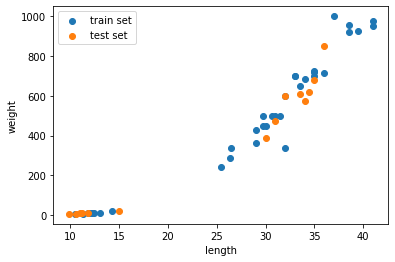

In [34]:
# 데이터 다시 확인
import matplotlib.pyplot as plt

# [:, 0]: 모든 행에서 0번째 -> length, [:, 1]: 모든 행에서 1번째 -> weight
plt.scatter(train_input[:, 0], train_input[:, 1], label='train set')
plt.scatter(test_input[:, 0], test_input[:, 1], label='test set')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [36]:
kn = kn.fit(train_input, train_target)

print("score: ", kn.score(test_input, test_target))
print("predict:     ", kn.predict(test_input))
print("test_target: ", test_target) # predict 결과값과 비교를 위해 출력

score:  1.0
predict:      [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
test_target:  [0 0 1 0 1 1 1 0 1 1 0 1 1 0]


In [39]:
# 문제점 발생
# 샘플 데이터의 두 특성(길이, 무게)의 스케일이 다르기 때문
# 스케일을 조정해야 됨: 표준점수(평균과의 거리)로 변환해야 됨
print('predict(길이 25cm, 무게 150g):', kn.predict([[25, 150.0]])) # 2차원배열 형태로

predict(길이 25cm, 무게 150g): [0]


---

In [ ]:
# column_stack((list1, list2,,,))
# Numpy 제공 함수: 리스트를 일렬로 세운 다음 차례대로 연결
# Python에서 제공하는 zip()함수와 동일한 기능

# numpy.hstack(): 리스트를 단순히 가로로 이어붙임
# numpy.concatenate((a1, a2,,,,), axis=0): 설정한 축을따라 배열을 붙임 0:세로 1:가로

In [40]:
# column_stack((list1, list2)): 튜플 형태로 전달
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [41]:
# ones(n), zeros(n)
# 개수(n)만큼 각각 1과 0으로 채운 배열을 생성함
print(np.ones(35))
print(np.zeros(14))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [44]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
# 사이킷런으로 훈련 세트와 테스트 세트 나누기
# train_test_split() 함수 원형
'''sklearn.model_selection.train_test_split(*arrays, 
                                            test_size=None,    # 미입력시 25% 비율로 테스트 세트 생성
                                            train_size=None,   # 미입력시 75% 비율로 훈련 세트 생성 
                                            random_state=None, # 랜덤 시드 설정
                                            shuffle=True,      
                                            stratify=None)'''  # target 데이터를 전달하면, 클래스 비율(0,1)에 맞게 데이터를 나눔


In [49]:
# 4개의 데이터 셋을 리턴

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target=train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print('train_input.shape:', train_input.shape,
      'test_input.shape', test_input.shape)


train_input.shape: (36, 2) test_input.shape (13, 2)


In [53]:
print('train_target: ', train_target)

train_target:  [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]


In [54]:
print('test_target: ', test_target)

test_target:  [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [56]:
# kNN모델 적용
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print("score: ", kn.score(test_input, test_target))

score:  1.0


In [57]:
# 25cm, 150g의 생선 분류 (수상한 도미)
print(kn.predict([[25, 150]]))

[0.]


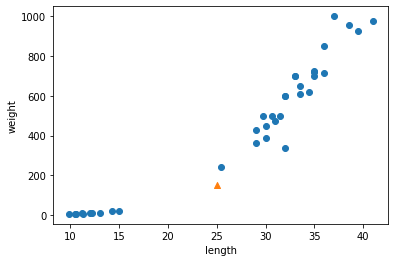

In [58]:
# 길이 25cm, 무게 150g의 생선을 산점도로 표시
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [59]:
# 가장 가까운 이웃과의 거리 계산

# kneighbors(): n_neighbors(default값 5)개의 이웃을 찾음
distances, indexes = kn.kneighbors([[25, 150]])
print(distances)
print(indexes) # 훈련데이터의 인덱스

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


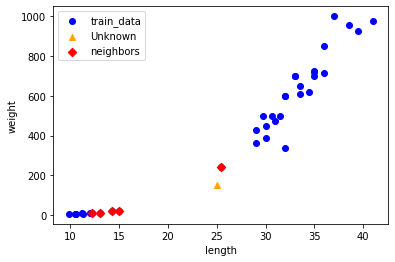

In [60]:
# 가장 가까운 이웃 5개를 산점도로 표시
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1], label='train_data', color='b')
plt.scatter(25, 150, marker='^', color='orange', label='Unknown')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1],
marker='D', label='neighbors', color='r')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [61]:
print("neighbors: ", train_input[indexes])
print("target: ", train_target[indexes]) # 훈련용 정답(25,150 이웃데이터 정답)

neighbors:  [[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
target:  [[1. 0. 0. 0. 0.]]


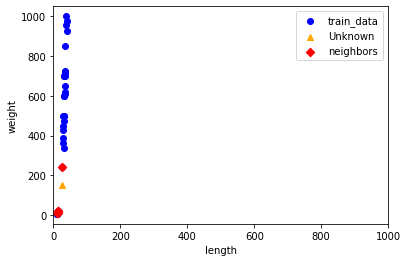

In [62]:
# Scale을 동일하게 수정: xlim(), ylim()함수: x, y축의 범위를 지정

plt.scatter(train_input[:, 0], train_input[:, 1], label='train_data', color='b')
plt.scatter(25, 150, marker='^', color='orange', label='Unknown')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D', label='neighbors', color='r')

plt.xlim((0, 1000)) # x축의 눈금 간격을 y축과 동일하게 변경

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [ ]:
# 브로드캐스팅(Broadcasting)

# 특정 조건에 맞는 경우, 크기가 다른 형태의 배열끼리 연산을 수행
# 크기가 작은 쪽의 배열을 큰 쪽의 배열 크기로 확장하여 연산

# 조건
# 각 배열의 차원의 크기가 일치하거나 
# 둘 중 하나의 길이가 1인 경우

In [ ]:
# 데이터 전처리
# 특성값을 일정한 기준으로 맞춤

# 표준점수(Standard Score, Z점수)
# 각 특성(길이, 무게)의 값이 0에서 표준편차의 몇 배 만큼 떨어져 있는지를 나타냄
# Z=(x-m)/std (x:특성값,m:평균,std:표준편차)

In [66]:
# 평균 및 표준편차 계산
mean = np.mean(train_input, axis=0) # axes=0: 각 컬럼의 평균 계산
std = np.std(train_input, axis=0)
print(mean, std) #[length평균 weight평균][length표준편차 weight표준편차]

# 표준점수 계산
train_scaled = (train_input - mean) / std # 표준 점수로 변환한 데이터
print(train_scaled[:3]) # 데이터확인(3개만)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]]


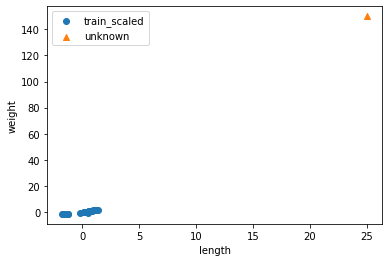

In [67]:
# 표준 점수로 변환한 훈련 데이터 분포 확인
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='train_scaled')
plt.scatter(25, 150, marker='^', label='unknown') # 표준화x
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

표준 점수 sample [-0.23012627 -0.94060693]


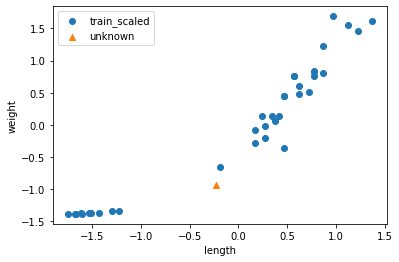

In [68]:
# 샘플 데이터를 표준 점수로 변환
new = ([25, 150] - mean) / std
print("표준 점수 sample", new)

plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='train_scaled')
plt.scatter(new[0], new[1], marker='^', label='unknown')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [69]:
# 표준점수로 변환한 훈련 데이터로 k-NN 훈련
kn.fit(train_scaled, train_target)

# 테스트 세트를 표준 점수로 변환
test_scaled = (test_input - mean) / std
print(kn.score(test_scaled, test_target))

# 표준 점수로 변환된 샘플 데이터를 가지고 예측
print(kn.predict([new]))

1.0
[1.]


[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]


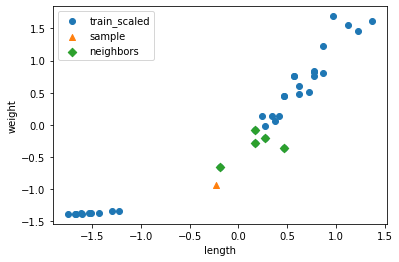

In [70]:
# 표준 점수로 변경된 샘플 데이터의 이웃 찾기 및 산점도
distances, indexes = kn.kneighbors([new])
print(distances)

plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='train_scaled')
plt.scatter(new[0], new[1], marker='^', label='sample')

# 이웃 데이터 표시
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D', label='neighbors')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()